In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import os
os.listdir("./data/shapefiles/turkeyborder/")

['TUR_adm1.cpg',
 'TUR_adm1.csv',
 'TUR_adm1.dbf',
 'TUR_adm1.prj',
 'TUR_adm1.shp',
 'TUR_adm1.shx']

In [3]:
gdf = gpd.read_file("./data/shapefiles/turkeyborder/TUR_adm1.shp")
gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [4]:
replace_map = {"K. Maras": "Kahramanmaraş", "Kinkkale": "Kırıkkale", "Zinguldak": "Zonguldak", "Afyon": "Afyonkarahisar","Çankiri":"Çankırı",
              "Adiyaman":"Adıyaman","Agri":"Ağrı","Aydin":"Aydın","Balikesir":"Balıkesir","Diyarbakir":"Diyarbakır","Eskisehir":"Eskişehir","Gümüshane":"Gümüşhane",
              "Istanbul":"İstanbul","Izmir":"İzmir","Kirklareli":"Kırklareli","Kirsehir":"Kırşehir","Mugla":"Muğla","Mus":"Muş","Nevsehir":"Nevşehir","Nigde":"Niğde",
              "Sanliurfa":"Şanlıurfa","Sirnak":"Şırnak","Tekirdag":"Tekirdağ","Usak":"Uşak"}
gdf['NAME_1'] = gdf['NAME_1'].replace(replace_map)

print(gdf['NAME_1'].tolist() )

['Çanakkale', 'Çankırı', 'Çorum', 'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Düzce', 'Denizli', 'Diyarbakır', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gümüşhane', 'Gaziantep', 'Giresun', 'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'İstanbul', 'İzmir', 'Kahramanmaraş', 'Kütahya', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Şanlıurfa', 'Siirt', 'Sinop', 'Şırnak', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak']


In [5]:
gdf = gdf[["NAME_1","geometry"]]
gdf.rename(columns={"NAME_1":"city"},inplace=True)
gdf.head()

,city,geometry
0,Çanakkale,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,Adana,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


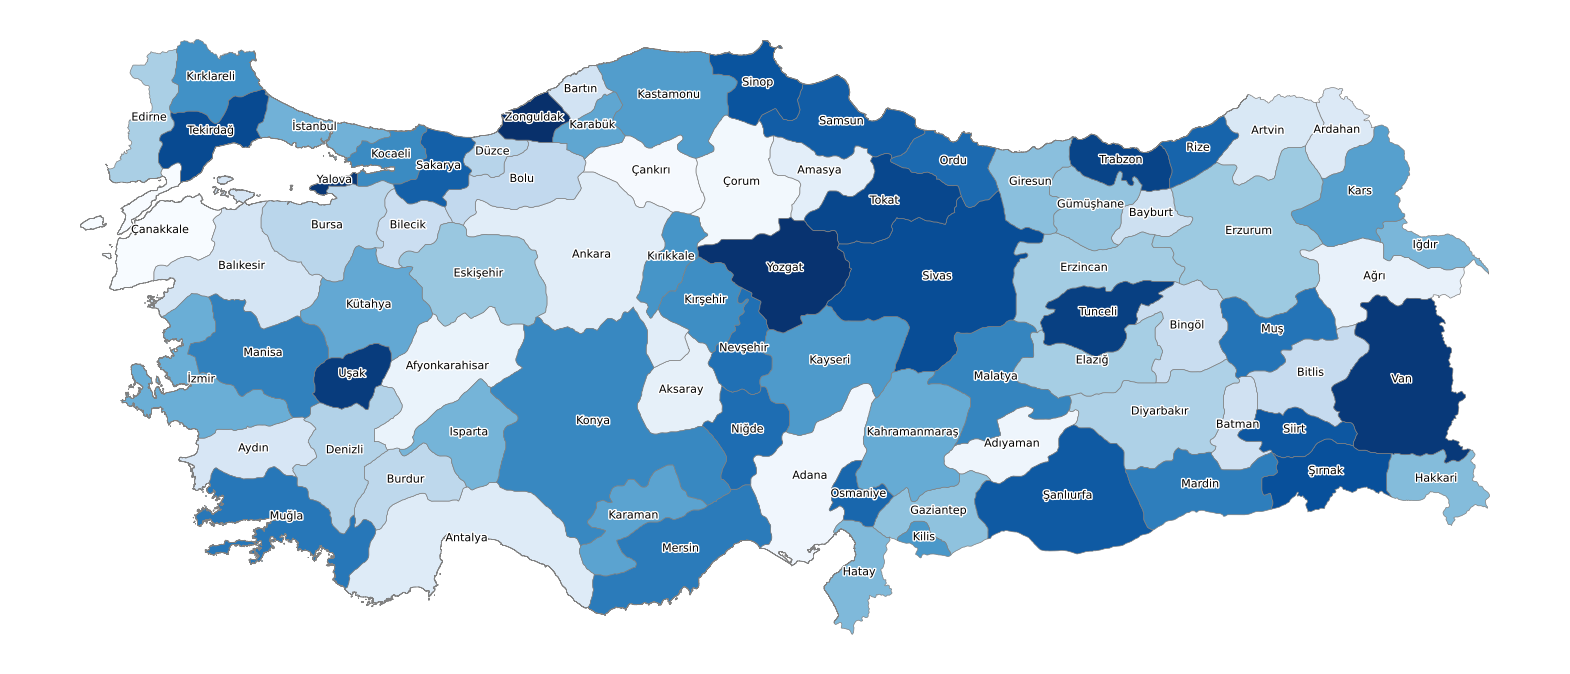

In [28]:
ax = gdf.plot(cmap="Blues", figsize = (20,10),edgecolor="gray",linewidth=.5)
ax.set_axis_off()
for idx in gdf.index:
    ax.text(round(gdf.loc[idx]["geometry"].centroid.x,2),round(gdf.loc[idx]["geometry"].centroid.y,2),gdf.loc[idx]["city"],
            fontsize=8,path_effects = [pe.withStroke(linewidth=2,foreground="white")],horizontalalignment ="center")

In [ ]:
%matplotlib notebook

gdf.loc[0]["geometry"].centroid.y

In [199]:
for i in range(0,81):
    print(gdf["geometry"][i].centroid.y)

C:\Users\User\AppData\Local\Temp\ipykernel_16212\1419644415.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(gdf["geometry"].centroid.y)


0     40.056610
1     40.689863
2     40.566335
3     37.461696
4     37.804292
        ...    
76    38.535099
77    38.475724
78    40.585422
79    39.662260
80    41.252044
Length: 81, dtype: float64
0     40.056610
1     40.689863
2     40.566335
3     37.461696
4     37.804292
        ...    
76    38.535099
77    38.475724
78    40.585422
79    39.662260
80    41.252044
Length: 81, dtype: float64
0     40.056610
1     40.689863
2     40.566335
3     37.461696
4     37.804292
        ...    
76    38.535099
77    38.475724
78    40.585422
79    39.662260
80    41.252044
Length: 81, dtype: float64
0     40.056610
1     40.689863
2     40.566335
3     37.461696
4     37.804292
        ...    
76    38.535099
77    38.475724
78    40.585422
79    39.662260
80    41.252044
Length: 81, dtype: float64
0     40.056610
1     40.689863
2     40.566335
3     37.461696
4     37.804292
        ...    
76    38.535099
77    38.475724
78    40.585422
79    39.662260
80    41.252044
Length: 81, 

In [148]:
gdf["geometry"]= gdf.to_crs('+proj=cea').centroid.to_crs(gdf.crs)


In [165]:
gdf

,city,geometry
0,Çanakkale,"MULTIPOLYGON (((27.28653 40.47514, 27.28653 40..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.81906 41.20172..."
3,Adana,"MULTIPOLYGON (((36.32964 37.92001, 36.32964 37..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...
76,Uşak,"POLYGON ((29.89273 38.77788, 29.89273 38.77788..."
77,Van,"POLYGON ((43.34184 39.39789, 43.34184 39.39789..."
78,Yalova,"POLYGON ((29.39486 40.70208, 29.39486 40.70208..."
79,Yozgat,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


In [163]:
gdf.crs = "epsg:4326" #identical to df2 = df2.set_crs('epsg:4326')
gdf = gdf.to_crs(crs=3857) 
gdf.geometry = gdf.buffer(0.001)
gdf = gdf.to_crs(crs=4326) 

In [158]:
gdf.to_crs(epsg=3395)

,city,geometry
0,Çanakkale,POINT (2977860.224 4846427.146)
1,Çankırı,POINT (3721032.862 4938714.629)
2,Çorum,POINT (3858564.332 4920425.480)
3,Adana,POINT (3962216.440 4477115.573)
4,Adıyaman,POINT (4267400.926 4525522.219)
...,...,...
76,Uşak,POINT (3268494.847 4628589.961)
77,Van,POINT (4857784.195 4619665.401)
78,Yalova,POINT (3241358.165 4923569.699)
79,Yozgat,POINT (3924250.123 4789483.737)


In [157]:
gdf.to_crs(2193)

,city,geometry
0,Çanakkale,POINT (-1299368.938 24975323.173)
1,Çankırı,POINT (-1837264.597 24622937.030)
2,Çorum,POINT (-1950026.925 24577361.820)
3,Adana,POINT (-2232228.630 24881625.908)
4,Adıyaman,POINT (-2458370.030 24694811.386)
...,...,...
76,Uşak,POINT (-1605693.654 25045300.224)
77,Van,POINT (-2878506.335 24294955.213)
78,Yalova,POINT (-1476090.746 24823514.222)
79,Yozgat,POINT (-2059203.680 24648924.033)


In [152]:
gdf["geometry"]

0     POINT (26.75057 40.05494)
1     POINT (33.42661 40.68901)
2     POINT (34.66207 40.56383)
3     POINT (35.59320 37.45775)
4     POINT (38.33471 37.80359)
                ...            
76    POINT (29.36139 38.53452)
77    POINT (43.63822 38.47152)
78    POINT (29.11762 40.58537)
79    POINT (35.25214 39.66071)
80    POINT (31.84002 41.25170)
Name: geometry, Length: 81, dtype: geometry